In [1]:
import sys
print(sys.path)
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')

['/home/andrew/Github/neuralink-bot/image_manipulation/color_segmentation', '', '/opt/ros/kinetic/lib/python2.7/dist-packages', '/home/andrew/anaconda3/lib/python37.zip', '/home/andrew/anaconda3/lib/python3.7', '/home/andrew/anaconda3/lib/python3.7/lib-dynload', '/home/andrew/anaconda3/lib/python3.7/site-packages', '/home/andrew/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/andrew/.ipython']


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Converting color representations


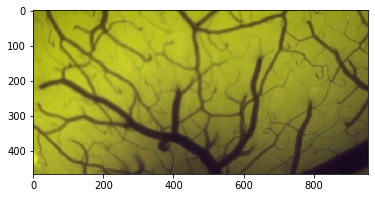

In [3]:
# Whoops forgot to convert from BGR to HSL
vessel_img = cv2.imread('/home/andrew/Github/neuralink-bot/image_manipulation/left_crop/left_crop_0.jpg')
plt.imshow(vessel_img)
plt.show()

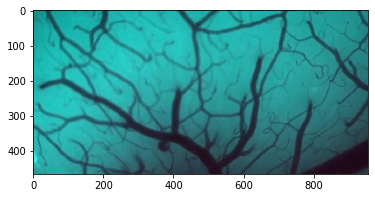

In [31]:
vessel_img = cv2.cvtColor(vessel_img, cv2.COLOR_BGR2RGB)
plt.imshow(vessel_img)
plt.show()

# 3d Plots

In [32]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

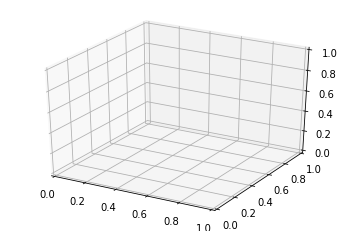

In [33]:
# .split looks like a really useful function. I need to remember that...
r, g, b = cv2.split(vessel_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

In [7]:
# Normalize the colors ranging from 0 --> 255 to 0 --> 1
pixel_colors = vessel_img.reshape((np.shape(vessel_img)[0]*np.shape(vessel_img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [8]:
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

# Converting to HSV

In [9]:
hsv_vessel = cv2.cvtColor(vessel_img, cv2.COLOR_RGB2HSV)

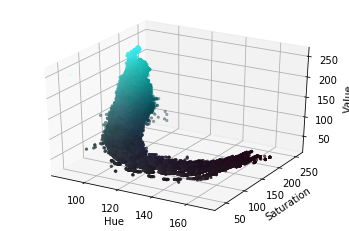

In [34]:
h, s, v = cv2.split(hsv_vessel)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

That is a wicked shape!

# Picking Out Specific Colors 

In [20]:
blue = (42,167,162)
black = (32,11,26)

In [21]:
# Divide by 255 to normalize the values
blu_square = np.full((10, 10, 3), blue, dtype=np.uint8) / 255.0
blk_square = np.full((10, 10, 3), black , dtype=np.uint8) / 255.0

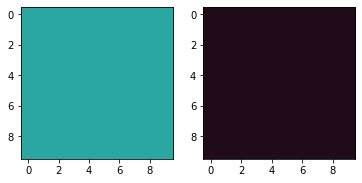

In [22]:
plt.subplot(1, 2, 1)
plt.imshow(blu_square)
plt.subplot(1, 2, 2)
plt.imshow(blk_square)
plt.show()

In [23]:
mask = cv2.inRange(hsv_vessel, blue, black)

In [24]:
result = cv2.bitwise_and(vessel_img, vessel_img, mask=mask)

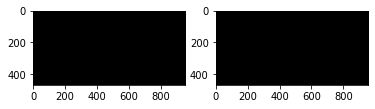

In [25]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()